# NOTEBOOK FOR SPECTRA RESAMPLING AND COMBINATION TESTING
Ideally want to resample the wavelength grid to that of our spectral resolution
- We can oversample but this will lead to correlation between points

# Import Packages

In [1]:
import numpy as np
import pandas as pd
import astropy.io.fits as apfits
import astropy.visualization as apvis
import astropy.nddata as apnndd
import astropy.table as aptable
import astropy.wcs as apwcs
import astropy.units as apunits
import astropy.coordinates as apcoords
import matplotlib.pyplot as mplplot
import matplotlib.patches as mplpatches
import glob
import os
import scipy as sp
import scipy.optimize as spopt
import copy
import grismconf
import sys
import spectres

# Load in Datasets required

In [34]:
file_path = '/Users/zx446701/Documents/Astro_Projects/Ice_Proposals/IceAge_ERS/Spectral_Extraction_Code/Test_Frame_Cluster_Outputs/'
P1 = 'jw01309025001_01101_00001_nrca5_rate_lv1.5_F444W_A_R_Primary1_Exp00001_'
P2 = 'jw01309025001_01101_00002_nrca5_rate_lv1.5_F444W_A_R_Primary1_Exp00002_'
P3 = 'jw01309025001_01101_00003_nrca5_rate_lv1.5_F444W_A_R_Primary1_Exp00003_'
P4 = 'jw01309025001_01101_00004_nrca5_rate_lv1.5_F444W_A_R_Primary1_Exp00004_'

initial_params = 'OptBoxInitParams_result_array.npy'
fitDF = 'fitted_dataframe.pkl'
res_arr = 'OptBoxInitParams_result_array.npy'
res_err_arr = 'OptBoxInitParams_result_error_array.npy'

trace_x = 'trace_x_pixels.npy'
trace_y = 'trace_y_pixels.npy'
trace_WL = 'trace_WL.npy'

In [36]:
in_frameP1_name = file_path + P1 + fitDF
in_frameP1 = pd.read_pickle(in_frameP1_name)
initial_paramsP1 = np.load(file_path + P1 + initial_params)
res_arrP1 = np.load(file_path + P1 + res_arr)
res_err_arrP1 = np.load(file_path + P1 + res_err_arr)
trace_xP1 = np.load(file_path + P1 + trace_x,allow_pickle=True)
trace_yP1 = np.load(file_path + P1 + trace_y,allow_pickle=True)
trace_WLP1 = np.load(file_path + P1 + trace_WL,allow_pickle=True)

in_frameP2_name = file_path + P2 + fitDF
in_frameP2 = pd.read_pickle(in_frameP2_name)
initial_paramsP2 = np.load(file_path + P2 + initial_params)
res_arrP2 = np.load(file_path + P2 + res_arr)
res_err_arrP2 = np.load(file_path + P2 + res_err_arr)
trace_xP2 = np.load(file_path + P2 + trace_x,allow_pickle=True)
trace_yP2 = np.load(file_path + P2 + trace_y,allow_pickle=True)
trace_WLP2 = np.load(file_path + P2 + trace_WL,allow_pickle=True)

in_frameP3_name = file_path + P3 + fitDF
in_frameP3 = pd.read_pickle(in_frameP3_name)
initial_paramsP3 = np.load(file_path + P3 + initial_params)
res_arrP3 = np.load(file_path + P3 + res_arr)
res_err_arrP3 = np.load(file_path + P3 + res_err_arr)
trace_xP3 = np.load(file_path + P3 + trace_x,allow_pickle=True)
trace_yP3 = np.load(file_path + P3 + trace_y,allow_pickle=True)
trace_WLP3 = np.load(file_path + P3 + trace_WL,allow_pickle=True)

in_frameP4_name = file_path + P4 + fitDF
in_frameP4 = pd.read_pickle(in_frameP4_name)
initial_paramsP4 = np.load(file_path + P4 + initial_params)
res_arrP4 = np.load(file_path + P4 + res_arr)
res_err_arrP4 = np.load(file_path + P1 + res_err_arr)
trace_xP4 = np.load(file_path + P4 + trace_x,allow_pickle=True)
trace_yP4 = np.load(file_path + P4 + trace_y,allow_pickle=True)
trace_WLP4 = np.load(file_path + P4 + trace_WL,allow_pickle=True)

In [135]:
display(pd.DataFrame(trace_WLP1).set_index(in_frameP1.FengwuID))
display(pd.DataFrame(trace_WLP2).set_index(in_frameP2.FengwuID))

,0
FengwuID,
54,"[4.305469244153728, 4.306473247544873, 4.30747..."
343,"[4.289405189895409, 4.290409193286554, 4.29141..."
154,"[4.272337132245944, 4.273341135637089, 4.27434..."
347,"[4.241213027120451, 4.242217030511596, 4.24322..."
345,"[4.231172993209001, 4.232176996600146, 4.23318..."
...,...
250,"[3.769331433282323, 3.770335436673468, 3.77133..."
10,"[3.769331433282323, 3.770335436673468, 3.77133..."
248,"[3.769331433282323, 3.770335436673468, 3.77133..."


,0
FengwuID,
54,"[4.296433213633423, 4.2974372170245685, 4.2984..."
343,"[4.279365155983959, 4.2803691593751045, 4.2813..."
154,"[4.262297098334495, 4.26330110172564, 4.264305..."
347,"[4.231172993209001, 4.232176996600146, 4.23318..."
345,"[4.221132959297552, 4.222136962688697, 4.22314..."
...,...
250,"[3.769331433282323, 3.770335436673468, 3.77133..."
10,"[3.769331433282323, 3.770335436673468, 3.77133..."
248,"[3.769331433282323, 3.770335436673468, 3.77133..."


In [110]:
print(trace_WLP1[0][0],trace_WLP2[0][0],trace_WLP3[0][0],trace_WLP4[0][0])

4.305469244153728 4.296433213633423 4.307477250936018 4.314505274674032


In [119]:
print(in_frameP1.FengwuID[0],in_frameP2.FengwuID[0],in_frameP3.FengwuID[0],in_frameP4.FengwuID[0])

54 54 54 54


### Extract Filter, module and direction set up

In [4]:
# Very specific to current file naming system
filter_ = in_frameP1_name[161:166]
module = in_frameP1_name[167]
direction = in_frameP1_name[169]
# primary = in_frameP1_name[178]
# exposure = in_frameP1_name[187]
print(filter_,module,direction)

F444W A R


## Sensivity Curve Crossover

Only necessary for 1st Order traces as F444W 2nd order traces are not strong enough, also the wavelengths will not crossover even if it was 

In [5]:
# THERE ARE NO FILES WITH DIRECTION = C
H2OSensFile = apfits.open(f"/Users/zx446701/OneDrive - The Open University/Ice_Age/Fengwu_Sims_2/GRISM_NIRCAM-master/V3/NIRCam.F322W2.{direction}.{module}.1st.sensitivity.fits")
# print(repr(SensFile[1].header)) # Units check
H2OSensTable = aptable.Table(H2OSensFile[1].data)
H2OSensData_WL = H2OSensTable[0][:]
H2OSensData_Sens = H2OSensTable[1][:]
H2OSensData_Er = H2OSensTable[2][:]

# Set up the Spectral Response Function Curve to perform Flux calibration (from ADU to Flux)
# fill_value = extrapolate required as the 2 wavelength ranges do not match
# SRFCurve = sp.interpolate.interp1d(SensData_WL,SensData_Sens,kind='linear',bounds_error=False,fill_value=0)#"extrapolate")
H2OSRFCurve = sp.interpolate.interp1d(H2OSensData_WL,H2OSensData_Sens,kind='cubic',fill_value="extrapolate")

# Create Dictionary of Curves to select from for flux calibration
H2OSRFCurves = {1: H2OSRFCurve}

In [6]:
# THERE ARE NO FILES WITH DIRECTION = C
COSensFile = apfits.open(f"/Users/zx446701/OneDrive - The Open University/Ice_Age/Fengwu_Sims_2/GRISM_NIRCAM-master/V3/NIRCam.F444W.{direction}.{module}.1st.sensitivity.fits")
# print(repr(SensFile[1].header)) # Units check
COSensTable = aptable.Table(COSensFile[1].data)
COSensData_WL = COSensTable[0][:]
COSensData_Sens = COSensTable[1][:]
COSensData_Er = COSensTable[2][:]

# Set up the Spectral Response Function Curve to perform Flux calibration (from ADU to Flux)
# fill_value = extrapolate required as the 2 wavelength ranges do not match
# SRFCurve = sp.interpolate.interp1d(SensData_WL,SensData_Sens,kind='linear',bounds_error=False,fill_value=0)#"extrapolate")
COSRFCurve = sp.interpolate.interp1d(COSensData_WL,COSensData_Sens,kind='cubic',fill_value="extrapolate")

# Create Dictionary of Curves to select from for flux calibration
COSRFCurves = {1: COSRFCurve}

Text(0.5, 1.05, '1st Order Sensitivity Curves for F322W2 A and F444W A')

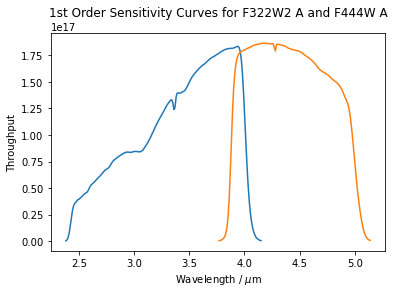

In [65]:
mplplot.plot(H2OSensData_WL,H2OSRFCurve(H2OSensData_WL))
mplplot.plot(COSensData_WL,COSRFCurve(COSensData_WL))
mplplot.xlabel("Wavelength / $\mu$m")
mplplot.ylabel("Throughput")
mplplot.title(f"1st Order Sensitivity Curves for F322W2 A and F444W A",y=1.05)

In [7]:
H2Ocondition = [H2OSensData_WL>COSensData_WL.min()]
COcondition = [COSensData_WL<H2OSensData_WL.max()]

maskH2OWL = H2OSensData_WL[H2Ocondition]
maskH2OSens = H2OSensData_Sens[H2Ocondition]
maskCOWL = COSensData_WL[COcondition]
maskCOSens = COSensData_Sens[COcondition]

H2O_LT_CO = H2OSensData_Sens[H2Ocondition]<COSensData_Sens[COcondition]
H2O_GT_CO = H2OSensData_Sens[H2Ocondition]>COSensData_Sens[COcondition]

/Users/zx446701/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.
/Users/zx446701/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """
/Users/zx446701/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` inst

In [8]:
# AFTER APPLYING CONDITION, THE LENGTH OF THE ARRAYS IS EQUAL (760)
# THEREFORE WE ARE ABLE TO WORK WITH ASTROPY COLUMNS OF SENS CURVES 
# TO FIND THE WAVELENGTH AT WHICH F444W SENS CURVE HAS HIGHER THROUGHPUT
# THIS IS PRINTED BELOW
# print(len(H2OSensData_WL[H2Ocondition]))
# print(len(COSensData_WL[COcondition]))

cross_WL = maskH2OWL[H2O_LT_CO][0]
cross_WL_TP = maskH2OSens[H2O_LT_CO][0]
print(cross_WL)

3.9630000000000014


### Plot demonstrating Throughput crossover

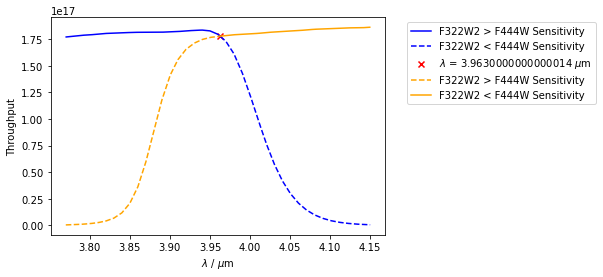

In [9]:
mplplot.plot(maskH2OWL[H2O_GT_CO],maskH2OSens[H2O_GT_CO],c='b',label="F322W2 > F444W Sensitivity")
mplplot.plot(maskH2OWL[H2O_LT_CO],maskH2OSens[H2O_LT_CO],c='b',ls='--',label="F322W2 < F444W Sensitivity")
mplplot.scatter(cross_WL,cross_WL_TP,c='r',marker='x',label=f'$\lambda$ = {cross_WL} $\mu$m')
mplplot.plot(maskCOWL[H2O_GT_CO],maskCOSens[H2O_GT_CO],c='orange',ls = '--',label="F322W2 > F444W Sensitivity")
mplplot.plot(maskCOWL[H2O_LT_CO],maskCOSens[H2O_LT_CO],c='orange',label="F322W2 < F444W Sensitivity")
mplplot.xlabel("$\lambda$ / $\mu$m")
mplplot.ylabel("Throughput")
mplplot.legend(loc='best',bbox_to_anchor=(1.05, 1))

## Flux calibration and Fengwu ID matching between frames

In [175]:
PSFSensCurves = []

primary_res_arrs = [res_arrP1,res_arrP2,res_arrP3,res_arrP4]
primary_trace_x = [trace_xP1,trace_xP2,trace_xP3,trace_xP4]
primary_trace_y = [trace_yP1,trace_yP2,trace_yP3,trace_yP4]
primary_trace_WL = [trace_WLP1,trace_WLP2,trace_WLP3,trace_WLP4]
primary_in_frame_data = [in_frameP1,in_frameP2,in_frameP3,in_frameP4]

# primary_calibrated_PSF_OptBox_Fluxes = []
# primary_calibrated_PSF_OptBox_FluxesErr = []

primaryFrameFluxCalData = []
primaryFrameFluxErrCalData = []

primaryTraceWLs = []

for idx , (res_arr,trace_x,trace_y,trace_WL,in_frame_data) in enumerate(zip(primary_res_arrs,primary_trace_x,primary_trace_y,primary_trace_WL,primary_in_frame_data)):

    PSFSensCurve = np.zeros_like(res_arr)

    # DO I NEED A FILTER AND MODULE CONDITION ON THIS DUE TO DIFFERENT DISP DIRECTIONS?
    # Currently for F444W A, wavelength follows low to high column number but B module would be reverse
    # THIS WOULD BE DONE ON THE CALIBRATED FLUX STEP LIKE RESULT / RESULTSENSCURVE[::-1]

    if direction == "R":

        for res_index, res in enumerate(res_arrP1):
            """
            # WHERE [1] SITS IT NEEDS TO READ [ORDER] IN GENERALISED CODE 
            """
            PSFSensCurve[res_index,trace_x[res_index]] = COSRFCurves[1](trace_WL[res_index])
    else:

        for res_index, res in enumerate(res_arrP1):
            PSFSensCurve[res_index,trace_y[res_index]] = COSRFCurves[1](trace_WL[res_index])

    PSFSensCurves.append(PSFSensCurve)
    

    calibrated_PSF_OptBox_Flux = res_arrP1/PSFSensCurve
    # primary_calibrated_PSF_OptBox_Fluxes.append(calibrated_PSF_OptBox_Flux)
    
    calibrated_PSF_OptBox_FluxErr = res_err_arrP1/PSFSensCurve
    # primary_calibrated_PSF_OptBox_FluxesErr.append(calibrated_PSF_OptBox_FluxErr)
    
    frameFluxCalData = pd.DataFrame(calibrated_PSF_OptBox_Flux).set_index(in_frame_data.FengwuID)
    primaryFrameFluxCalData.append(frameFluxCalData)
    
    frameFluxErrCalData = pd.DataFrame(calibrated_PSF_OptBox_FluxErr).set_index(in_frame_data.FengwuID)
    primaryFrameFluxErrCalData.append(frameFluxErrCalData)
    
    primaryTraceWL = pd.DataFrame(trace_WL).set_index(in_frame_data.FengwuID)
    primaryTraceWLs.append(primaryTraceWL)

/Users/zx446701/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
/Users/zx446701/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide
/Users/zx446701/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/Users/zx446701/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide


### Concatenate Dataframes

In [101]:
PrimaryDitherFluxes = pd.concat(primaryFrameFluxCalData).sort_index()
PrimaryDitherFluxesErr = pd.concat(primaryFrameFluxErrCalData).sort_index()
PrimaryDitherTraceWLs = pd.concat(primaryTraceWLs).sort_index()

## Plotting Setup

In [190]:
print(len(calibrated_PSF_OptBox_Flux[2]))
print(len(calibrated_PSF_OptBox_Flux[2][~np.isnan(calibrated_PSF_OptBox_Flux[2])]))#|(np.isnan(initial_paramsP1[2]))]))
print(len(trace_WLP1[2]))

2048
836
866


In [51]:
print(sum(initial_paramsP1[0] < 999))
print(sum(np.isnan(initial_paramsP1[0])))
#WHY ARE THERE RANDOMLY MISSING DATA POINTS?
# WILL SPECTRES JUST DEAL WITH THIS????
print(np.where(np.isnan(initial_paramsP1[0])))
print(sum(np.isnan(calibrated_PSF_OptBox_Flux[0])))

2032
16
(array([  0,   1,   2,   3,  89, 140, 168, 334, 352, 521, 546, 547, 661,
       736, 748, 820]),)
1231


(4.443017708740586, 4.449041729087456)

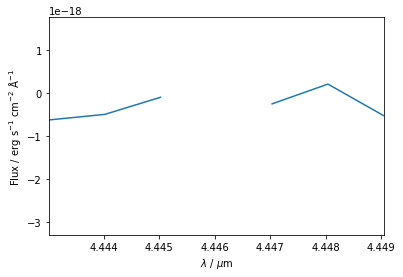

In [60]:
# Optimally Weighted Box Method Extraction 

wavelengths = trace_WLP1[0]
non_nan_wavelength_condition = (~np.isnan(calibrated_PSF_OptBox_Flux[0]))|(np.isnan(initial_paramsP1[0]))

if filter_ == "F322W2":
    wavelengths_mask = (wavelengths>=2.5) & (wavelengths<3.9)
else:
    wavelengths_mask = (wavelengths>=3.9) & (wavelengths<5)

calibrated_PSF_OptBox_Flux_non_nan = calibrated_PSF_OptBox_Flux[0][non_nan_wavelength_condition]
# print(np.any(np.isnan(make_it_work)))
# print(np.min(make_it_work))
# make_it_work = calibrated_PSF_OptBox_Flux[0][(initial_paramsP1[0] < 999) | (np.isnan(initial_paramsP1[0]))]
mplplot.plot(wavelengths[wavelengths_mask],calibrated_PSF_OptBox_Flux_non_nan[wavelengths_mask])
mplplot.xlabel('$\lambda$ / $\mu$m')
mplplot.ylabel("Flux / erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$")
mplplot.xlim(wavelengths[137],wavelengths[143])

## Combination Time

For now, set a hard limit on the max wavelength of F322W2 and minimum wavelength of F444W as 3.963μm for seamless stitching of spectra. 
If we find any spectra which have data within these crossover wavelengths, we can consider combining this data at a latter stage.

Thinking about number of bins required:
- Something I am uncertain on how to set right now so will experiment for now.

Can try:
- Resampling filters to separate wavelength ranges and then combining
    - Will mean we need a common wavelength for F322W2 filter to end with and F444W begins
or:
- Resample both filters to full wavelength range and then combine
    - This approach will allow full datasets to be used

Need to consider cutting off wavelength ranges in accordance to sensitivity curves
- Plot both filter sensitivity curves and determine which wavelengths to keep and which to cut
    - Use the wavelength at which the throughput's overlap for maximum sensitivity?


In [69]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [93]:
len(COSensData_WL)

2741

In [185]:
testFL = PrimaryDitherFluxes.reset_index()
testFL[testFL.FengwuID==0].loc[0][1:].values[~np.isnan(testFL[testFL.FengwuID==0].loc[0][1:].values)]

array([ 0.00000000e+00,  0.00000000e+00,  1.17563074e-16, ...,
        8.74994812e-18,  1.21565197e-17, -5.05155838e-18])

In [157]:
testER = PrimaryDitherFluxesErr.reset_index()

testWL= PrimaryDitherTraceWLs.reset_index()

In [178]:
len(testWL[testFL.FengwuID==0].loc[0][0])

1301

In [168]:
new_wavs

array([3.77      , 3.77100809, 3.77201619, ..., 5.13798381, 5.13899191,
       5.14      ])

In [179]:
nbins = 500

# Experiment with wavelength ranges
# Attempt 1: Full WL range of Sens Filter with SAME NUMBER OF BINS AS WAVELENGTHS
new_wavs = np.linspace(np.min(COSensData_WL),np.max(COSensData_WL), nbins)
"""
binned_fluxes, binned_errors = spectres.spectres(new_wavs, current_WL_range, current_flux, spec_errs=current_flux_err, fill=None, verbose=False)
"""

binned_fluxes, binned_errors = spectres.spectres(new_wavs, testWL[testFL.FengwuID==0].loc[0][0], testFL[testFL.FengwuID==0].loc[0][1:].values, spec_errs=testER[testFL.FengwuID==0].loc[0][1:].values, fill=None, verbose=False)


<ErrorbarContainer object of 3 artists>

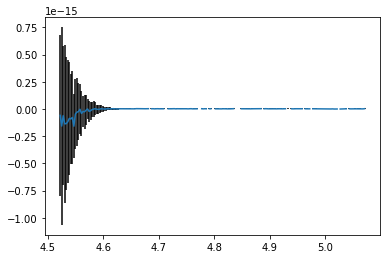

In [181]:
mplplot.errorbar(new_wavs,binned_fluxes,yerr=binned_errors,ecolor='k',)
# mplplot.ylim(0,5e-17)